# Linear regression with one variable

Demonstration of linear regression with one variable, by predicting house prices based on the number of rooms per house.

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
# Boston house price dataset
# http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
houses = datasets.load_boston()

In [3]:
houses.data.shape

(506, 13)

There are 506 examples, each with 13 features. We'll just use one feature - the average number of rooms per house, which is feature 5.

In [4]:
# Average number of rooms per house
X = houses.data[:, 5]

# Take a peek
X[:5]

array([ 6.575,  6.421,  7.185,  6.998,  7.147])

The dataset is averaged over >506 actual houses, hence we can have non-integer number of rooms.

In [5]:
# Average house price ($10,000), our target variable
y = houses.target

# Take a peek
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

## Visualise data

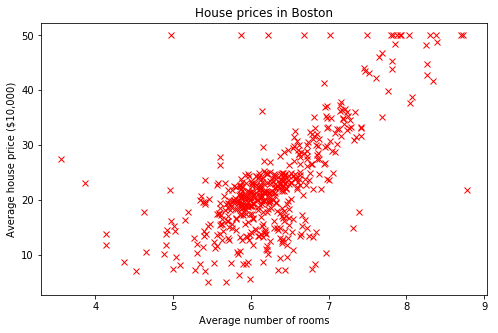

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(X, y, 'rx')
plt.title('House prices in Boston')
plt.ylabel('Average house price ($10,000)')
plt.xlabel('Average number of rooms')
plt.show()

## Clean and format data

The multiple examples with an average price of exactly $500,000 are clearly not natural, they are presumably some sort of error with the data or an artificial ceiling that has been imposed. Since the price of these houses is impossible to predict from the feature, we'll remove these examples from our dataset.

In [7]:
np.sum(y==50)/len(y)

0.031620553359683792

These examples only make up ~3% of our dataset, so we only lose a small fraction of our data.

Also, it's probably safe to assume that any predictions we would want to make using the model would be done with the goal of predicting the "real" price, rather than predicting an artificially suppressed price of exactly $500,000.

In [8]:
# Remove examples with price of exactly $500,000
to_remove = np.argwhere(y==50)
y = np.delete(y, to_remove)
X = np.delete(X, to_remove)

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# LinearRegression() requires 2D arrays
y_train = y_train[:, np.newaxis]
X_train = X_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
X_test = X_test[:, np.newaxis]

## Train and test linear regression

In [11]:
# Train
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Test
y_pred = model.predict(X_test)

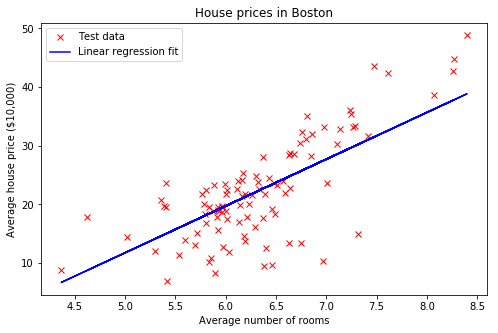

In [13]:
# Display test data and fit
plt.figure(figsize=(8, 5))
plt.plot(X_test, y_test, 'rx', label='Test data')
plt.plot(X_test, y_pred, 'b-', label='Linear regression fit')
plt.title('House prices in Boston')
plt.legend()
plt.ylabel('Average house price ($10,000)')
plt.xlabel('Average number of rooms')
plt.show()

In [14]:
# Quantify performance
print('Fit results:')
print('\tGradient: $%.0f per room.' % (model.coef_*1e4))
print('\tIntercept: $%.0f.' % (model.intercept_*1e4))

print('Performance metrics:')
print('\tMedian absolute error: $%.0f.' % (median_absolute_error(y_test, y_pred)*1e4))
print('\tR2 score: %.2f.' % (r2_score(y_test, y_pred)))

Fit results:
	Gradient: $79806 per room.
	Intercept: $-281772.
Performance metrics:
	Median absolute error: $37075.
	R2 score: 0.56.


Due to the small size of the test set, and the random train-test split, the performance metrics vary quite a lot each time the notebook is executed. R2 seems to vary between approximately 0.35 - 0.65. We could attain more consistent results if we had more data.